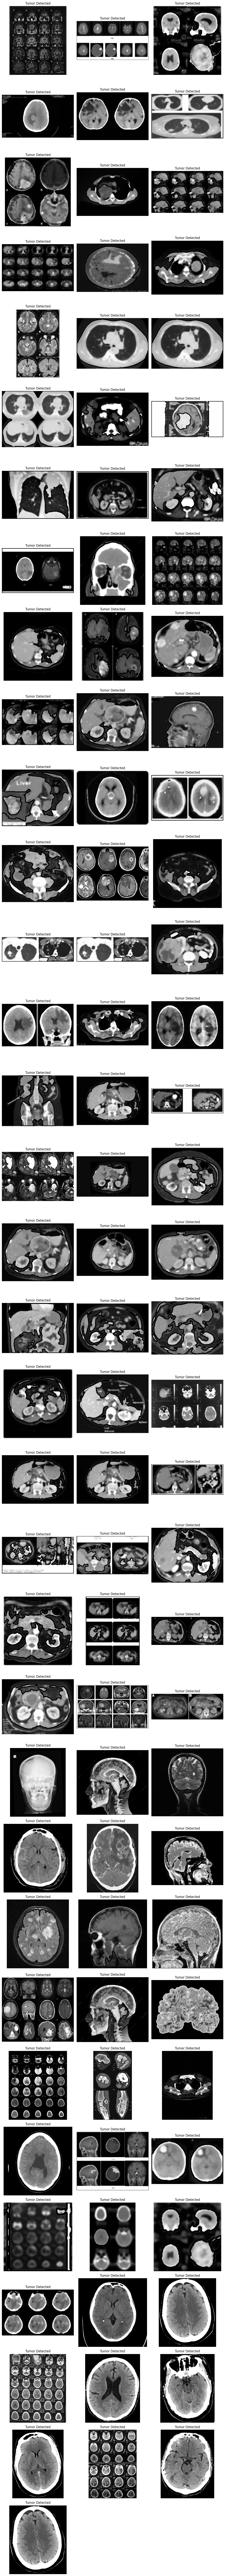

In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

# Load daftar file citra CT Scan
image_files = glob.glob('C:/Users/User/PCD/UAS PCD/CT Scan Tumor/*.jpg')

# Inisialisasi variabel untuk menampilkan citra dalam grid
rows = int(np.ceil(len(image_files) / 3))
fig, axes = plt.subplots(rows, 3, figsize=(12, 4 * rows))
axes = axes.flatten()

# Nilai threshold yang digunakan untuk deteksi tumor
threshold_value = 1000

for i, file in enumerate(image_files):
    # Load citra CT Scan
    try:
        image = cv2.imread(file, 0)
        if image is None:
            raise Exception("Failed to load image:", file)
    except Exception as e:
        print(e)
        continue

    # Pra-pemrosesan
    image = cv2.medianBlur(image, 5)
    image = cv2.GaussianBlur(image, (5, 5), 0)

    # Segmentasi
    ret, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Ekstraksi fitur
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Deteksi tumor
    tumor_detected = False
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > threshold_value:
            # Tandai tumor pada citra
            cv2.drawContours(image, [contour], 0, (0, 255, 0), 2)
            tumor_detected = True

    # Tampilkan citra dengan tumor yang ditandai dalam grid
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')
    if tumor_detected:
        axes[i].set_title('Tumor Detected')
    else:
        axes[i].set_title('No Tumor')

# Hapus akses yang tidak terpakai
for j in range(len(image_files), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
